In [101]:
# import dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm
import json
import requests
from env.config import api_key
import random as random
from pprint import pprint

In [102]:
#1. Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

coordinates = []

# Create the bounding box
#set latitude values - X values
miny = -45
maxy = 45

#set longitude values - Y values
minx = -180
maxx = 180

In [103]:
#2. lookup citipy based on values and get cities
cities = []
cities_found_count = 0

def verify_unique_city(city):
    return city not in cities


def find_city(lng, lat):
    return citipy.nearest_city(lat, lon)


while cities_found_count<500:
    lat, lon =(random.uniform(minx,maxx),random.uniform(miny,maxy))
    city = citipy.nearest_city(lat, lon)
    if verify_unique_city(city)is True:
        cities.append(city)
        cities_found_count = cities_found_count +1


city_names = []   
for city in cities:
    city_names.append(city.city_name)

In [104]:
#3.Perform a weather check on each of the cities using a series of successive API calls.

url = "http://api.openweathermap.org/data/2.5/weather?"

city_ids = []
city_lon = []
city_lat = []
city_urls =[]
city_max_temps =[]
city_humidities =[]
city_cloudiness =[]
city_wind_speeds =[]
city_urls =[]

for city_name in city_names:
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city_name
    city_urls.append(query_url)

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
#     pprint(weather_json)

    try:
        city_ids.append(weather_json['id'])
    except KeyError:
        city_ids.append("")
        
    try:
        city_lat.append(int(weather_json['coord']['lat']))
    except KeyError:
        city_lat.append(np.nan)
        
    try:
        city_lon.append(int(weather_json['coord']['lon']))
    except KeyError:
        city_lon.append(np.nan)
        
    try:
        city_max_temps.append(weather_json['main']['temp_max'])
    except KeyError:
        city_max_temps.append(np.nan)
        
    try:
        city_humidities.append(weather_json['main']['humidity'])
    except KeyError:
        city_humidities.append(np.nan)
        
    try:
        city_cloudiness.append(weather_json['clouds']['all'])
    except KeyError:
        city_cloudiness.append("")
        
    try:
        city_wind_speeds.append(weather_json['wind']['speed'])
    except KeyError:
        city_wind_speeds.append(np.nan)


In [105]:
df = pd.DataFrame({
    'City':city_names,
    'id':city_ids,
    'max_temp':city_max_temps,
    'humidity':city_humidities,
    'cloudiness':city_cloudiness,
    'wind_speed':city_wind_speeds,
    "longitude":city_lon,
    'latitude':city_lat,
    'url':city_urls
})

df.head()

,City,cloudiness,humidity,id,latitude,longitude,max_temp,url,wind_speed
0,qaanaaq,0,83.0,3831208,77.0,-69.0,265.426,http://api.openweathermap.org/data/2.5/weather...,2.77
1,hermanus,44,86.0,3366880,-34.0,19.0,288.026,http://api.openweathermap.org/data/2.5/weather...,5.02
2,chuy,80,99.0,3443061,-33.0,-53.0,287.726,http://api.openweathermap.org/data/2.5/weather...,4.67
3,qaqortoq,75,64.0,3420846,60.0,-46.0,274.150,http://api.openweathermap.org/data/2.5/weather...,2.60
4,xiropotamos,75,88.0,733818,41.0,24.0,291.150,http://api.openweathermap.org/data/2.5/weather...,1.50


In [109]:
#remove NaN values
df.dropna(how='any', inplace=True)
df.head()

#save as csv file
df.to_csv("city_weather.csv",encoding="utf-8", index=False, header=True)

## Max Temperature (F) vs. Latitude

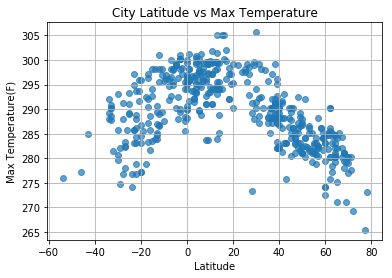

In [110]:
# Max Temperature (F) vs. Latitude
plt.scatter(df["latitude"], df["max_temp"], marker="o",alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureByLatitude.png")

# Show plot
plt.show()

## Humidity (%) vs. Latitude

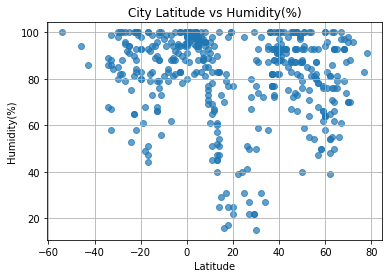

In [111]:
# Humidity(%) vs. Latitude
plt.scatter(df["latitude"], df["humidity"], marker="o",alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("PercentHumidityByLatitude.png")

# Show plot
plt.show()

## Cloudiness (%) vs. Latitude

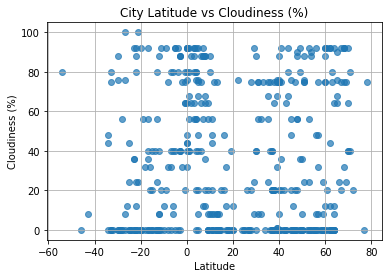

In [112]:
# Cloudiness(%) vs. Latitude
plt.scatter(df["latitude"], df["cloudiness"], marker="o",alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("PercentCloudinessByLatitude.png")

# Show plot
plt.show()

## Wind Speed (mph) vs. Latitude

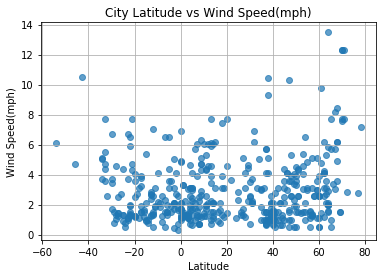

In [113]:
# Cloudiness(%) vs. Latitude
plt.scatter(df["latitude"], df["wind_speed"], marker="o",alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedByLatitude.png")

# Show plot
plt.show()